In [1]:
%cd ..

/Users/jannes/Documents/Science/Real-Projects/P3-JP-Synapse-Paper/git-p3/learning_as_filtering_new


In [2]:
ls 

README.md      main.sh        pkl_data/      run_local.sh   src/
main.py        notebooks/     pull.sh        run_remote.sh  util/


- Code new learning rule
    - alpha_bar
    - x_wiggle (low pass)
- Ensure that gamma is constant
- Think of systematic comparison of Sigma in 1d
- Run on cluster for various hyperpars
    - beta
    - tau_x_wiggle
    - tau_d
    - check norm of x_eps
    - (?)
     

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import itertools as it

from src.plotting import *
from src.update_functions import *
from src.init_functions import *
from src.run_functions import *

def expspace(a0, an, n=50):
    """ linspace in exp space """
    return (a0 * np.exp(np.log(an / a0) * np.linspace(0, 1, n)))

In [4]:
p = {'t_num': 4000,
     'dt': 0.001,
     'dim':2,
     'tau':0.025,
     'g0':1,
     'beta':0.5,
     'mu_ou':0,
     'sig2_ou':1,     
     'tau_ou':1000, # s
     'rule':'corr'
    }
p['g0dt'] = p['g0']*p['dt']

# STDP
p['delta_T'] = 0.01
p['wait'] = 0.5 # s

# correlation protocol
p['correlated_times'] = np.array([0, 0.01]) # s, two spikes

# bias
p['include-bias'] = False
p['sig2_oub'] = 1
p['tau_oub'] = 0.025
p['mu_oub'] = 1.0
# spike response
p['include-spike-response-kernel'] = True
p['tau_alpha'] = 0.025
p['amplitude_alpha'] = -3/p['beta']
# single vector rules
p['tau_z'] = 1

p['tau_d'] = p['tau_ou'] # ?
p['tau_x_wiggle'] = p['tau_ou'] # good
p['compute_sig2'] = True
p['gamma_equal_g0'] = True

# performance sims:
p['epoch_num'] = 10
p['epoch_wait'] = 2
p['rate'] = 40 # Hz

Performance simulation 

In [5]:
p['tau_ou'] = 4
p['tau_d'] = 1
p['tau_x_wiggle'] = 1
p['beta'] = 0.02
p['dim'] = 1
p['dt'] = 0.001

p['include-spike-response-kernel'] = False
p['include-bias'] = False

p['rule'] = 'exp-rm2'
out,v = run_simulation(p,verbose=True,online=False)

p['rule'] = 'corr'
out,v2 = run_simulation(p,verbose=True,online=False)

KeyboardInterrupt: 

In [ ]:
vplt(v,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
vplt(v2,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)

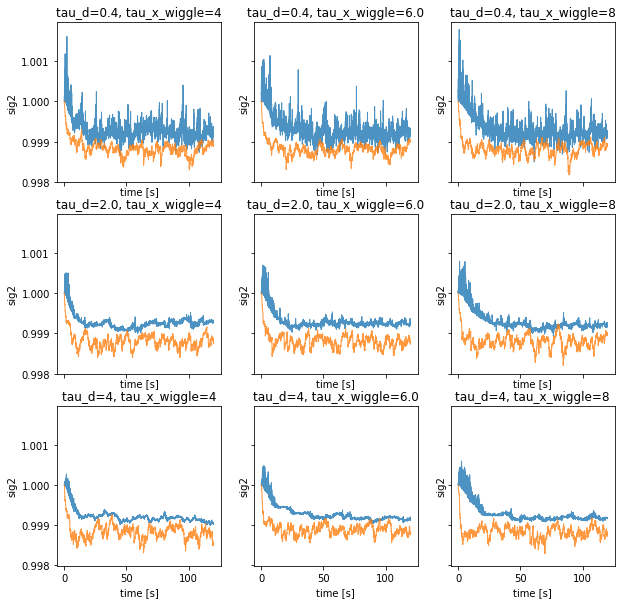

(None, None)

In [62]:
p['tau_ou'] = 4
tau_ds = [0.1,0.5,1]
tau_x_wiggles = [1,1.5,2]
f, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=[10,10])
for ax, (tau_d, tau_x_wiggle) in zip(
    axs.reshape(-1), it.product(tau_ds, tau_x_wiggles)):

    p['tau_d'] = tau_d*p['tau_ou']
    p['tau_x_wiggle'] = tau_x_wiggle*p['tau_ou']
    p['beta'] = 0.02
    p['dim'] = 1
    p['dt'] = 0.001

    p['include-spike-response-kernel'] = False
    p['include-bias'] = False

    p['rule'] = 'exp-rm2'
    out,v = run_simulation(p,verbose=True,online=False)

    p['rule'] = 'corr'
    out,v2 = run_simulation(p,verbose=True,online=False)

    plt.sca(ax)
    vplt(v,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
    vplt(v2,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
    
    tau_dd = p['tau_d']
    tau_x_wigglee = p['tau_x_wiggle']
    plt.title(f'tau_d={tau_dd}, tau_x_wiggle={tau_x_wigglee}')
    
plt.show(), plt.close()

With larger beta

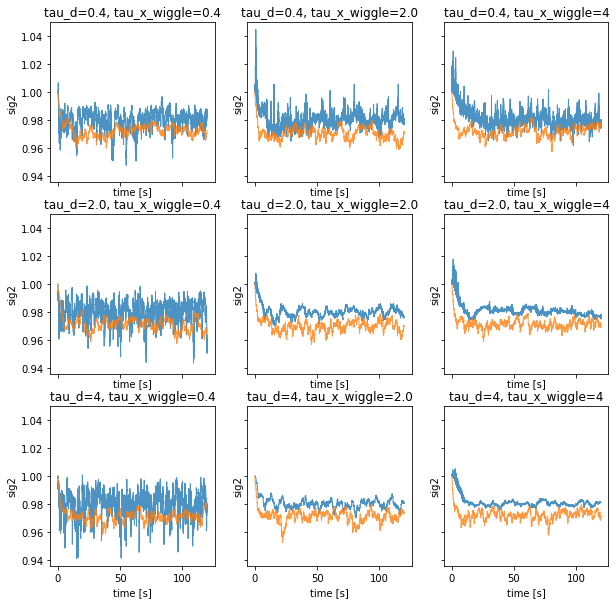

(None, None)

In [36]:
p['tau_ou'] = 4
tau_ds = [0.1,0.5,1]
tau_x_wiggles = [0.1,0.5,1]
f, axs = plt.subplots(3,3,sharex=True,sharey=True,figsize=[10,10])
for ax, (tau_d, tau_x_wiggle) in zip(
    axs.reshape(-1), it.product(tau_ds, tau_x_wiggles)):

    p['tau_d'] = tau_d*p['tau_ou']
    p['tau_x_wiggle'] = tau_x_wiggle*p['tau_ou']
    p['beta'] = 0.1
    p['dim'] = 1
    p['dt'] = 0.001

    p['include-spike-response-kernel'] = False
    p['include-bias'] = False

    p['rule'] = 'exp-rm2'
    out,v = run_simulation(p,verbose=True,online=False)

    p['rule'] = 'corr'
    out,v2 = run_simulation(p,verbose=True,online=False)

    plt.sca(ax)
    vplt(v,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
    vplt(v2,p,key='sig2',dim=0,cut=1,c=None,err=True,alpha=0.8)
    
    tau_dd = p['tau_d']
    tau_x_wigglee = p['tau_x_wiggle']
    plt.title(f'tau_d={tau_dd}, tau_x_wiggle={tau_x_wigglee}')
    
plt.show(), plt.close()

Plot Sigma_infty with errorbars as function of beta:

In [71]:
#10*63000/3600 # hours

1.75

In [152]:
p['tau_ou'] = 4
p['tau_d'] = 4
p['tau_x_wiggle'] = 6
p['beta'] = 0.1
p['dim'] = 1
p['dt'] = 0.001
p['epoch_num'] = 30
p['include-spike-response-kernel'] = False
p['include-bias'] = False
p['compute_sig2'] = True # for plotting?


              #'rules':  ('corr','exp','exp-rm2'),
              #'repeats': range(10),
              
mp = {'betas': np.linspace(0.01,0.3,21), # alternative: expspace
      'rules':  ('corr','exp','exp-rm2'),
      'repeats': range(10),
      'dims': [1,2,3,4,5,7,9,11,13,15,20,25,30,40,50]
     }

length = len(list(it.product(mp['betas'], mp['rules'], mp['repeats'])))
res = []

parameter_list = list(enumerate(it.product(mp['betas'],
                                                mp['rules'], mp['repeats'], mp['dims'])))

#parameter_list = list(enumerate(it.product(mp['betas'], mp['rules'], mp['repeats'])))

for count, (beta, rule, repeat, dim) in parameter_list:    
    print(count,'/',length,'rule:',rule,'beta:',beta)
    p['rule'] = rule
    p['beta'] = beta
    
    out,v = run_simulation(p,verbose=True,online=False)
    
    out = out.mean().to_dict()
    out.update({'beta':beta,'rule':rule})       
    res.append(out)
res = pd.DataFrame(res)

0 / 630 rule: corr beta: 0.01


KeyboardInterrupt: 

In [153]:
parameter_list

[(0, (0.01, 'corr', 0, 1)),
 (1, (0.01, 'corr', 0, 2)),
 (2, (0.01, 'corr', 0, 3)),
 (3, (0.01, 'corr', 0, 4)),
 (4, (0.01, 'corr', 0, 5)),
 (5, (0.01, 'corr', 0, 7)),
 (6, (0.01, 'corr', 0, 9)),
 (7, (0.01, 'corr', 0, 11)),
 (8, (0.01, 'corr', 0, 13)),
 (9, (0.01, 'corr', 0, 15)),
 (10, (0.01, 'corr', 0, 20)),
 (11, (0.01, 'corr', 0, 25)),
 (12, (0.01, 'corr', 0, 30)),
 (13, (0.01, 'corr', 0, 40)),
 (14, (0.01, 'corr', 0, 50)),
 (15, (0.01, 'corr', 1, 1)),
 (16, (0.01, 'corr', 1, 2)),
 (17, (0.01, 'corr', 1, 3)),
 (18, (0.01, 'corr', 1, 4)),
 (19, (0.01, 'corr', 1, 5)),
 (20, (0.01, 'corr', 1, 7)),
 (21, (0.01, 'corr', 1, 9)),
 (22, (0.01, 'corr', 1, 11)),
 (23, (0.01, 'corr', 1, 13)),
 (24, (0.01, 'corr', 1, 15)),
 (25, (0.01, 'corr', 1, 20)),
 (26, (0.01, 'corr', 1, 25)),
 (27, (0.01, 'corr', 1, 30)),
 (28, (0.01, 'corr', 1, 40)),
 (29, (0.01, 'corr', 1, 50)),
 (30, (0.01, 'corr', 2, 1)),
 (31, (0.01, 'corr', 2, 2)),
 (32, (0.01, 'corr', 2, 3)),
 (33, (0.01, 'corr', 2, 4)),
 (34, (0

In [114]:
def plot_res(res, metrics = ['MSE','sig2'],ylims=None, xaxis='beta'):
    res2 = res[['rule',xaxis] + metrics]
    mean = res2.groupby(['rule',xaxis]).mean()
    sem = res2.groupby(['rule',xaxis]).sem()

    f,axs = plt.subplots(len(metrics),1,figsize=[8,6], tight_layout=True,sharex=True)
    for metric,ax in zip(metrics,axs.reshape(-1)):
        ax.set_ylabel(metric)

        for rule in mp['rules']:
            mean.loc[rule,metric].plot(label=rule,ax=ax,marker='o',yerr=sem.loc[rule,metric])
            
        if ylims is not None:
            ax.set_ylim(ylims[metric])
            
        ax.legend(ncol=len(mp['rules']))
        #ax.set_xscale('log')
        ax.set_title(metric)
        #ax.set_yscale('log')
        

In [166]:
from pathlib import Path
#file_path = Path('./../c_28-Feb-2021-beta_lin/pkl_data/')
file_path = Path('./../c_07-Mar-2021-beta_lin_dim2/pkl_data/')
import pickle
def load_obj(name, path='./'):
    #    print('load obj:',os.getcwd())
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [167]:
res3 = pd.concat([load_obj(str(path)[:-4]) for path in file_path.glob('**/*.pkl')])

In [168]:
res3

,L,L_pt,MSE,beta,count,dim,gbar_gg_one,gdt_gg_one,gmap_gg_one,rule
0,0.000037,0.000033,0.978141,0.3,50,50,0.0,0.0,0.0,exp
0,0.000000,0.000000,1.180108,0.3,44,10,0.0,0.0,0.0,exp-rm2
0,0.000010,0.000008,1.011993,0.3,45,50,0.0,0.0,0.0,corr
0,-0.000003,-0.000008,1.006974,0.3,51,50,0.0,0.0,0.0,exp
0,0.000008,0.000003,0.944667,0.3,47,50,0.0,0.0,0.0,corr
...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,1.002877,0.3,73,100,0.0,0.0,0.0,exp-rm2
0,0.000003,0.000011,1.019811,0.3,67,100,0.0,0.0,0.0,exp
0,0.000000,0.000000,1.014565,0.3,74,100,0.0,0.0,0.0,exp-rm2
0,-0.000002,0.000001,0.925532,0.3,48,50,0.0,0.0,0.0,corr


In [169]:
res = res3

In [170]:
#plot_res(res3, metrics=['MSE','L'], ylims={'MSE':(0.6,1.1), 'sig2':(0,1.1) }, xaxis='dim')
metrics = ['MSE','L']
#def plot_res(res, metrics = ['MSE','sig2'],ylims=None, xaxis='beta'):
xaxis='dim'
res2 = res[['rule',xaxis] + metrics]
mean = res2.groupby(['rule',xaxis]).mean()
sem = res2.groupby(['rule',xaxis]).sem()

In [171]:
mean

MSE         L
rule    dim                    
corr    1    0.760036  0.000016
        5    0.997609 -0.000002
        10   1.050091  0.000014
        50   0.951938  0.000007
exp     1    0.756796  0.000003
        5    0.952826  0.000004
        10   0.988440  0.000019
        50   0.995606  0.000008
        100  1.005899  0.000010
exp-rm2 1    0.897704  0.000000
        5    0.872053  0.000000
        10   1.006875  0.000000
        50   0.986436  0.000000
        100  1.005501  0.000000

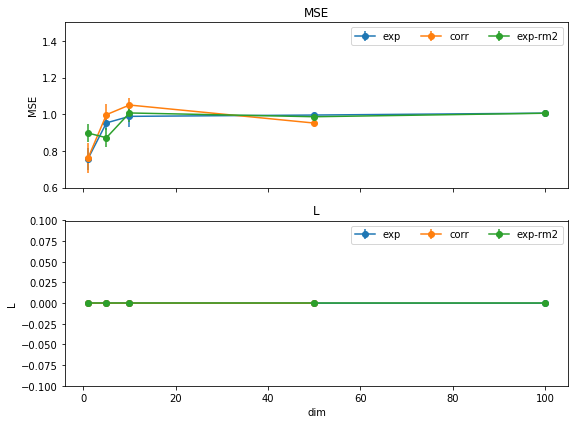

In [172]:
ylims={'MSE':(0.6,1.5), 'L':(-0.1,0.1) }
f,axs = plt.subplots(len(metrics),1,figsize=[8,6], tight_layout=True,sharex=True)
for metric,ax in zip(metrics,axs.reshape(-1)):
    ax.set_ylabel(metric)

    for rule in ['exp', 'corr','exp-rm2']:
        mean.loc[rule,metric].plot(label=rule,ax=ax,marker='o',yerr=sem.loc[rule,metric])

    if ylims is not None:
        ax.set_ylim(ylims[metric])

    ax.legend(ncol=len(mp['rules']))
    ax.set_title(metric)

Insights:
- exp-rm2 has no loglike because of gamma = g0
- without beta scaling, high dim values wont work
- all corr-sims were killed (probably because they contained a dim=100 case)

Mitigation:
- focus on dim only
- scale beta

In [141]:
i_max = 100
i = 0
mp = {'betas': [p['beta']], #np.linspace(0.01,1,21),
      'rules':  ('corr','exp','exp-rm2'),
      'repeats': range(5),
      'dims': [1, 5, 10, 50, 100]}
res = []

parameter_list = list(enumerate(it.product(mp['betas'], mp['rules'], mp['repeats'], mp['dims'])))
length = len(parameter_list)

def assign_parameters_to_maximally_imax_nodes(i_max, i, parameter_list):
    num_pars = len(parameter_list)
    ii_to_run = np.where(np.arange(num_pars)[[int(ii/(num_pars/i_max)) for ii in range(num_pars)]] == i)[0]
    parameter_list_to_run = [parameter_list[ii] for ii in ii_to_run]
    return parameter_list_to_run


if i != -1:
    # maximally i_max sims
    if len(parameter_list) < i_max + 1:
        parameter_list = [parameter_list[i]]
    else:
        parameter_list = assign_parameters_to_maximally_imax_nodes(
                        i_max=i_max, i=i, parameter_list=parameter_list)
parameter_list

[(0, (0.01, 'corr', 0, 1))]

[(12, (0.01, 'corr', 2, 10)),
 (13, (0.01, 'corr', 2, 50)),
 (14, (0.01, 'corr', 2, 100)),
 (15, (0.01, 'corr', 3, 1)),
 (16, (0.01, 'corr', 3, 5)),
 (17, (0.01, 'corr', 3, 10)),
 (18, (0.01, 'corr', 3, 50)),
 (19, (0.01, 'corr', 3, 100)),
 (20, (0.01, 'corr', 4, 1)),
 (21, (0.01, 'corr', 4, 5)),
 (22, (0.01, 'corr', 4, 10))]

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


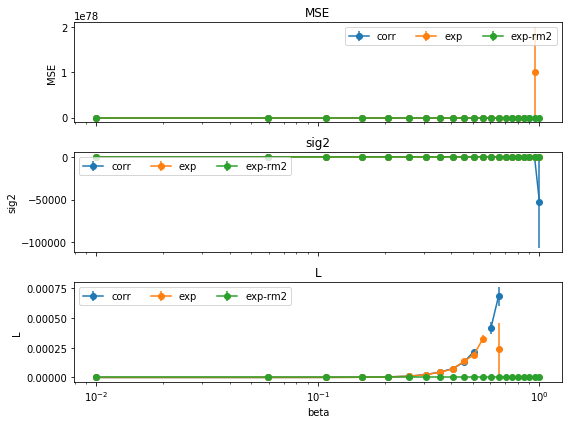

In [76]:
res = pd.DataFrame(res)
plot_res(res3,['MSE','sig2','L'])

In [22]:
res[res.rule=='corr']

,MSE,L,L_pt,sig2,gbar_gg_one,gmap_gg_one,gdt_gg_one,beta,rule
0,0.344189,-7.990295e-10,-6.673024e-10,0.999997,0.0,0.0,0.0,0.001000,corr
1,0.211084,-5.291752e-10,-6.119114e-10,0.999997,0.0,0.0,0.0,0.001000,corr
2,0.238437,1.737966e-09,1.559293e-09,0.999997,0.0,0.0,0.0,0.001000,corr
9,0.697724,-9.989418e-08,-3.590660e-08,0.999053,0.0,0.0,0.0,0.017321,corr
10,0.947311,-1.342355e-07,-4.895946e-08,0.999101,0.0,0.0,0.0,0.017321,corr
11,0.290799,4.954362e-07,2.897223e-07,0.999063,0.0,0.0,0.0,0.017321,corr
18,0.268770,4.165837e-06,3.296863e-05,0.821950,0.0,0.0,0.0,0.300000,corr
19,0.685422,8.394918e-06,5.382517e-06,0.772519,0.0,0.0,0.0,0.300000,corr
20,0.973936,-2.728610e-05,-1.492792e-05,0.809765,0.0,0.0,0.0,0.300000,corr


Older stuff

In [ ]:
A = p['sig2_ou']*p['beta']**2*p['g0dt']/p['dt']*p['tau_ou']/2
out.mean()

In [ ]:
f,axs = plt.subplots(p['dim'],1,figsize=[12,10])
for dim,ax in zip(range(p['dim']),axs.reshape(-1)):
    plt.sca(ax)
    vplt(v,p,key='filter',dim=dim,cut=1,c=None,err=True,alpha=0.8)

In [ ]:
parameter_list = list(enumerate(it.product(mp['betas'], mp['rules'], mp['repeats'])))
def assign_parameters_to_maximally_imax_nodes(i_max, i, parameter_list):
    num_pars = len(parameter_list)
    ii_to_run = np.where(np.arange(num_pars)[[int(ii/(num_pars/i_max)) for ii in range(num_pars)]] == i)[0]
    parameter_list_to_run = [parameter_list[ii] for ii in ii_to_run]
    return parameter_list_to_run
i_max = 100
i = 4

In [ ]:
assign_parameters_to_maximally_imax_nodes(i_max,i,parameter_list)

In [ ]:
len(parameter_list)

In [ ]:
p['tau_ou'] = 5*20
p['tau_z'] = 5*20
p['beta'] = 0.1
p['dim'] = 1
p['dt'] = 0.001
p['epoch_num'] = 50 # 2 * 2 * 5 = 20
p['include-spike-response-kernel'] = False
p['include-bias'] = False

mp = {'betas': expspace(0.001,0.3,5*2),
      'rules':  ('corr','exp','exp-rm2') , # ('exp','corr','exp-oja','exp-rm'), 
      'repeats': range(20)}
length = len(list(it.product(mp['betas'], mp['rules'], mp['repeats'])))
res = []


parameter_list = list(enumerate(it.product(mp['betas'], mp['rules'], mp['repeats'])))

for count, (beta, rule, repeat) in parameter_list:    
    print(count,'/',length,'rule:',rule,'beta:',beta)
    p['rule'] = rule
    p['beta'] = beta
    out,v = run_simulation(p,verbose=True,online=True)
    out = out.mean().to_dict()        
    
    # what about diag vs matrix??? corr vs exp-rm2
    mean = np.mean(v['sig2'][k0:k])
    std = np.std(v['sig2'][k0:k])
            
    print(rule,mean,std)
    
    out.update({'beta':beta,'rule':rule})                
    out.update({'Sigma_mean': mean})
    out.update({'Sigma_std': std})
    out.update({'alpha_bar': A3})
    
    
    res.append(out)    
res = pd.DataFrame(res)

In [ ]:
v

In [ ]:
import sys, os
from util.util import load_obj

In [ ]:
path = '../c_08-Feb-2021-beta100/pkl_data/'
dfs = []
for file in [file for file in os.listdir(path) if 'pkl' in file[-4:]]:
    dfs.append(load_obj(path + file[:-4]))
dfs = pd.concat(dfs)

In [ ]:
def assign_parameters_to_maximally_imax_nodes(i_max, i, parameter_list):
    num_pars = parameter_list
    ii_to_run = np.where(np.arange(num_pars)[[int(ii/(num_pars/i_max)) for ii in range(num_pars)]] == i)[0]
    parameter_list_to_run = [parameter_list[ii] for ii in ii_to_run]
    return parameter_list_to_run

In [ ]:
res = dfs.copy()
res

In [ ]:
### eval sigma

In [ ]:
res2 = res.drop(list(res.columns)[1:6],axis=1)
mean = res2.groupby(['rule','beta']).mean()
sem = res2.groupby(['rule','beta']).sem()

f,axs = plt.subplots(4,1,figsize=[12,10])
for metric,ax in zip(('MSE','Sigma_mean','Sigma_std','alpha_bar'),axs.reshape(-1)):
    ax.set_ylabel(metric)
    
    # fix
#    if 'L' in metric:
 #       ax.set_ylim([-0.00000001,0.00000001])
     #   mean[metric] += 1
                    
    for rule in mp['rules']:
        #if ((rule != 'corr') and (metric != 'alpha_bar')):     
        mean.loc[rule,metric].plot(label=rule,ax=ax,marker='o',yerr=sem.loc[rule,metric])
    ax.legend(ncol=len(mp['rules']))
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    

### eval performance

In [ ]:
res2 = res.sort_values('count').drop(list(res.columns)[3:6],axis=1)

res2 = res2[res2.beta < 0.1]

mean = res2.groupby(['rule','beta']).mean()
sem = res2.groupby(['rule','beta']).sem()

f,axs = plt.subplots(1,3,figsize=[12,6], tight_layout=True)
for metric,ax in zip(('MSE','L','L_pt'),axs.reshape(-1)):
    ax.set_ylabel(metric)
    
    # fix
    if 'L' in metric:
        #ax.set_ylim([-0.00000001,0.00000001])
        unit = 10**6
        mean[metric] *= unit
        sem[metric] *= unit
    #for rule in ['corr','exp']:
    for rule in mp['rules']:
        mean.loc[rule,metric].plot(label=rule,ax=ax,marker='o',yerr=sem.loc[rule,metric])
    ax.legend() #ncol=len(mp['rules']))
    ax.set_xscale('log')
    #ax.set_yscale('log')
f.suptitle(r'Parameters: $T_{\max}=50 \tau_{ou}, \tau_{ou} = \tau_{z} = 100s, d=1, n_{sim} = 20$', y=1.05)
    

What did I learn from this?
1. I can run on cluster again. Good.
2. Probably multiple tau_z = 100s are needed.
3. Probably more averaging is needed.
4. Very small beta is not meaningful, zoom into the range.
5. be less verbose in output
6. g0 vs gamma_approx
7. check sigma_t vs sigma_approx_t -> quantify the difference between the true and false?

# STDP / Heterosynaptic plasticity 

In [ ]:
mp = {'num_delta_T':21,
      'delta_T_max':0.1,
      'delta_T_min':-0.1}

Compare two rules for single time series

In [ ]:
test_rule = 'exp-rm'
p['rule'] = test_rule
p['delta_T'] = 0.1
p['dim'] = 1
v, states = run_timeseries(p,hetero=False)

p['rule'] = 'corr'
v2, states = run_timeseries(p,hetero=False)

#p['rule'] = 'corr'
#v2, states = run_timeseries(p,hetero=False)

In [ ]:
fig, axs = plt.subplots(2,2,tight_layout=True, sharex=True)
plt.sca(axs[0,0])
vplt(v,p,'mu',0) #, plt.xlim([0.45,.55])
plt.title('deltaT={0}, dim={1}, beta={2}'.format(p['delta_T'],p['dim'],p['beta']))
plt.sca(axs[0,1])

vplt(v2,p,'mu',0,c='red') #, plt.xlim([0.45,.55])
plt.title('deltaT={0}, dim={1}, beta={2}'.format(p['delta_T'],p['dim'],p['beta']))

plt.sca(axs[1,0])
vplt(v,p,'sig2',0) #, plt.xlim([0.45,.55])
#plt.title('sig2(t) and z(t)')
plt.ylabel('z(t)')
plt.sca(axs[1,1])
vplt(v2,p,'sig2',0,c='red') #, plt.xlim([0.45,.55])
#plt.title('sig2(t) and z(t)')
#plt.gca().legend(['exp-z','corr'])

Compare STDP protocol for two rules

In [ ]:
p['dim'] = 1
p['rule'] = test_rule
out = run_STDP(mp,p)
p['rule'] = 'corr'
out2 = run_STDP(mp,p)

In [ ]:
d = 0
def plt_stdp(out,d=0,c='k'):
    xplt, dmu = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out]).T
    plt.plot(xplt,dmu,c=c)
    plt.title('beta={0}, rule={1}'.format(p['beta'],p['rule']))

fig, axs = plt.subplots(1,2,tight_layout=True)
plt.sca(axs[0])
p['rule'] = test_rule
plt_stdp(out)
p['rule'] = 'corr'
plt.sca(axs[1])
plt_stdp(out2,c='red')
#plt.gca().legend(['exp-z','corr'])

In [ ]:
p['rule'] = 'corr' # SF
p['dim'] = 2
v, states = run_timeseries(p,hetero=True)
out = run_STDP(mp,p,hetero=True)

p['rule'] = test_rule
v2, states = run_timeseries(p,hetero=True)
out2 = run_STDP(mp,p,hetero=True)

In [ ]:
A = p['beta']**2*(p['g0dt']/p['dt'])*p['tau_ou'] # OK 
A

In [ ]:
fig, axs = plt.subplots(1,2,tight_layout=True)
for i, out_i, rule in zip([0,1],[out,out2],['corr',test_rule] ):
    plt.sca(axs[i])
    d = 0
    xplt, dmu = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out_i]).T
    d = 1
    xplt, dmu2 = np.array([(item['delta_T'], item['mu_f'][d] - item['mu_0'][d]) for item in out_i]).T
    plt.plot(xplt,dmu,c='k',lw=1,label='Syn 1')
    plt.plot(xplt,dmu2,c='red',lw=1,label='Syn 2')
    plt.gca().legend()
    plt.title('Hetero {1} b={0}'.format(p['beta'],rule))
